# DSAI 456 - Speech Processing
## Final Lab Practice Exam

**Name:** Your Name  
**ID:** Your ID  
**Date:** _______

---

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import get_window
from scipy.stats import multivariate_normal

---
# Part A: Audio Signal Processing (25 marks)

## Question 1: Audio Feature Extraction (10 marks)

In [9]:
def extract_audio_features(audio_path, sr=22050, frame_length=2048, hop_length=512):
    """
    Extract intensity and pitch from an audio file.

    Args:
        audio_path (str): Path to audio file
        sr (int): Sample rate
        frame_length (int): Frame length for analysis
        hop_length (int): Hop length between frames

    Returns:
        times (np.ndarray): Time axis
        intensity (np.ndarray): RMS energy per frame
        pitch (np.ndarray): Fundamental frequency per frame
    """
    # ----- YOUR CODE HERE -----
    # Load audio
    y, sr_loaded = librosa.load(audio_path, sr=sr)

    # Compute RMS energy
    # librosa.feature.rms returns an array of shape (1, n_frames). We want (n_frames,)
    intensity = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

    # Compute pitch using pyin
    # librosa.pyin returns fundamental frequency, voiced_flag, voiced_probs
    # We only need the pitch (F0)
    pitch, voiced_flag, voiced_probs = librosa.pyin(
        y, sr=sr_loaded, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
        frame_length=frame_length, hop_length=hop_length
    )

    # Compute time axis. The number of frames for intensity and pitch should be the same.
    times = librosa.frames_to_time(
        np.arange(len(pitch)),
        sr=sr_loaded,
        hop_length=hop_length
    )

    return times, intensity, pitch

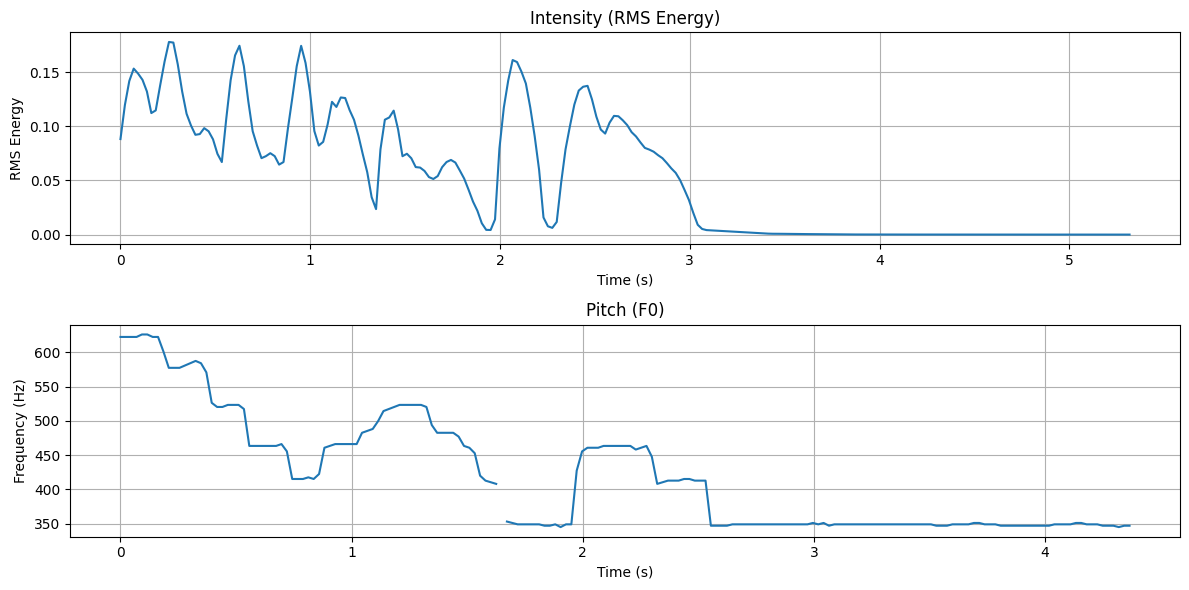

In [10]:
# Test Question 1
# For demonstration, let's use a librosa example audio
audio_path_example = librosa.ex('trumpet') # Using a sample audio from librosa

times, intensity, pitch = extract_audio_features(audio_path_example)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times, intensity)
plt.title('Intensity (RMS Energy)')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.grid(True)

plt.subplot(2, 1, 2)
# Only plot non-zero pitch values or values above a certain threshold for better visualization
# Also, replace NaN values (unvoiced sections) with NaN for plotting gaps
pitch_display = np.where(pitch > 0, pitch, np.nan)
plt.plot(times, pitch_display)
plt.title('Pitch (F0)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Question 2: Spectrogram Analysis (15 marks)

### Part A: FFT Analysis (8 marks)

In [11]:
def compute_frequency_spectrum(signal, sr):
    """
    Compute the frequency spectrum using FFT.

    Args:
        signal (np.ndarray): Audio signal
        sr (int): Sample rate

    Returns:
        frequencies (np.ndarray): Frequency bins
        magnitudes (np.ndarray): Magnitude spectrum
    """
    # ----- YOUR CODE HERE -----
    # Compute FFT for real-valued signal
    fft_result = np.fft.rfft(signal)

    # Get positive frequencies only
    frequencies = np.fft.rfftfreq(len(signal), d=1/sr)

    # Compute magnitude spectrum
    magnitudes = np.abs(fft_result)

    return frequencies, magnitudes

### Part B: STFT Spectrogram (7 marks)

In [12]:
def compute_spectrogram(signal, sr, n_fft=2048, hop_length=512, window='hann'):
    """
    Compute spectrogram using STFT.

    Args:
        signal (np.ndarray): Audio signal
        sr (int): Sample rate
        n_fft (int): FFT size
        hop_length (int): Hop length
        window (str): Window function

    Returns:
        spectrogram (np.ndarray): Magnitude spectrogram in dB
        times (np.ndarray): Time axis
        frequencies (np.ndarray): Frequency axis
    """
    # ----- YOUR CODE HERE -----
    # Create window
    win = get_window(window, n_fft)

    # Compute STFT frame by frame
    stft_result = librosa.stft(y=signal, n_fft=n_fft, hop_length=hop_length, window=win)

    # Compute magnitude spectrogram
    magnitude_spectrogram = np.abs(stft_result)

    # Convert to dB scale
    spectrogram_db = librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max)

    # Compute time and frequency axes
    times = librosa.frames_to_time(np.arange(spectrogram_db.shape[1]), sr=sr, hop_length=hop_length)
    frequencies = librosa.fft.fft_frequencies(sr=sr, n_fft=n_fft)

    return spectrogram_db, times, frequencies

---
# Part B: Mel-Frequency Analysis (20 marks)

## Question 3: Mel Filter Bank Design (10 marks)

In [ ]:
def hz_to_mel(hz):
    """Convert frequency from Hz to Mel scale."""
    # ----- YOUR CODE HERE -----
    # Formula: mel = 2595 * log10(1 + hz/700)
    pass

def mel_to_hz(mel):
    """Convert frequency from Mel scale to Hz."""
    # ----- YOUR CODE HERE -----
    # Formula: hz = 700 * (10^(mel/2595) - 1)
    pass

def create_mel_filterbank(n_filters, n_fft, sr, f_min=0, f_max=None):
    """
    Create a Mel filter bank.

    Args:
        n_filters (int): Number of Mel filters
        n_fft (int): FFT size
        sr (int): Sample rate
        f_min (float): Minimum frequency
        f_max (float): Maximum frequency

    Returns:
        filterbank (np.ndarray): Mel filter bank matrix of shape (n_filters, n_fft//2 + 1)
    """
    # ----- YOUR CODE HERE -----
    # 1. Convert f_min and f_max to Mel scale

    # 2. Create evenly spaced Mel points

    # 3. Convert back to Hz

    # 4. Convert to FFT bin numbers

    # 5. Create triangular filters

    pass

## Question 4: Mel Spectrogram Computation (10 marks)

In [ ]:
def compute_mel_spectrogram(signal, sr, n_fft=2048, hop_length=512, n_mels=40):
    """
    Compute Mel spectrogram.

    Args:
        signal (np.ndarray): Audio signal
        sr (int): Sample rate
        n_fft (int): FFT size
        hop_length (int): Hop length
        n_mels (int): Number of Mel bands

    Returns:
        mel_spectrogram (np.ndarray): Mel spectrogram in dB
    """
    # ----- YOUR CODE HERE -----
    # 1. Compute power spectrogram

    # 2. Create Mel filter bank

    # 3. Apply filter bank to spectrogram

    # 4. Convert to dB scale

    pass

---
# Part C: Gaussian Mixture Models (15 marks)

## Question 5: EM Algorithm for GMM (15 marks)

**You are NOT allowed to use `sklearn.mixture.GaussianMixture` or any GMM library.**

GMM: let's go
we the algo equation: 1- sum(pi*N(X|m, sigma).

we make Expectation: (pi*N(X|m, sigma)/sum(pi*N(X|m, sigma)) step

   then we update params with maximization step pi=Nk/N) and m=1/N(sum y*X)  and sigma=1/N(X-M)^2

In [ ]:
def gmm_em(X, K, iters=50):

    # Gaussian Mixture Model using Expectation-Maximization (EM)

    # Args:
    #     X     : (N, D) data matrix
    #     K     : number of Gaussian components
    #     iters : number of EM iterations

    # Returns:
    #     pi    : mixture weights (K,)
    #     mu    : means of Gaussians (K, D)
    #     sigma : covariance matrices (K, D, D)
    #

    # N = number of data points, D = dimensionality
    N, D = X.shape

    # Init
    pi = np.ones(K) / K
    mu = X[np.random.choice(N, K, replace=False)]
    sigma = np.array([np.eye(D)] * K)

    for _ in range(iters):
        # E-step
        gamma = np.zeros((N, K))
        for k in range(K):
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mu[k], sigma[k])
        gamma /= gamma.sum(axis=1, keepdims=True)

        # M-step
        N_k = gamma.sum(axis=0)
        pi = N_k / N
        mu = gamma.T @ X / N_k[:, None]

        for k in range(K):
            diff = X - mu[k]
            sigma[k] = (gamma[:, k] * diff.T) @ diff / N_k[k]

    return pi, mu, sigma

In [ ]:
# Test GMM EM
# Generate synthetic data
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([2, 2])
X2 = np.random.randn(100, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])

# Fit GMM
# pi, mu, sigma, ll_history = gmm_em(X, n_components=2)
# print("Mixture weights:", pi)
# print("Means:", mu)

---
# Part D: Hidden Markov Models (20 marks)

## Question 6: Forward Algorithm (10 marks)

**You are NOT allowed to use `hmmlearn` or any HMM library.**

In [ ]:
def forward_algorithm(pi, A, B, O):
    """
    Compute forward probabilities for a discrete HMM.

    Args:
        pi (np.ndarray): Initial state probabilities (N,)
        A (np.ndarray): State transition matrix (N, N)
        B (np.ndarray): Emission probability matrix (N, M)
        O (list): Observation sequence as indices

    Returns:
        alpha (np.ndarray): Forward probabilities (T, N)
        likelihood (float): P(O|λ)
    """
    # ----- YOUR CODE HERE -----
    # Initialize

    # Recursion

    # Termination

    pass

In [ ]:
# Test Forward Algorithm
pi = np.array([0.7, 0.3])
A = np.array([[0.8, 0.2],
              [0.3, 0.7]])
B = np.array([[0.6, 0.3, 0.1],
              [0.2, 0.5, 0.3]])
O = [1, 0, 2]

# Expected likelihood ≈ 0.0652
# alpha, likelihood = forward_algorithm(pi, A, B, O)
# print("Alpha table:")
# print(alpha)
# print(f"\nLikelihood P(O|λ): {likelihood:.6f}")

## Question 7: Viterbi Algorithm (10 marks)

**You are NOT allowed to use `hmmlearn` or any HMM library.**

In [ ]:
def viterbi_algorithm(pi, A, B, O):
    """
    Find the most likely hidden state sequence using Viterbi algorithm.
    Use LOG PROBABILITIES to avoid numerical underflow.

    Args:
        pi (np.ndarray): Initial state probabilities (N,)
        A (np.ndarray): State transition matrix (N, N)
        B (np.ndarray): Emission probability matrix (N, M)
        O (list): Observation sequence as indices

    Returns:
        best_path (list): Most likely state sequence
        log_prob (float): Log-probability of the best path
    """
    # ----- YOUR CODE HERE -----
    # Convert to log probabilities

    # Initialize delta and psi

    # Recursion

    # Termination

    # Backtracking

    pass

In [ ]:
# Test Viterbi Algorithm
pi = np.array([0.5, 0.5])
A = np.array([[0.6, 0.4],
              [0.2, 0.8]])
B = np.array([[0.7, 0.2, 0.1],
              [0.1, 0.3, 0.6]])
O = [2, 1, 0, 1]

# best_path, log_prob = viterbi_algorithm(pi, A, B, O)
# print(f"Most likely state sequence: {best_path}")
# print(f"Log probability: {log_prob:.6f}")

---
# Part E: Connectionist Temporal Classification (20 marks)

## Question 8: CTC Forward Algorithm (10 marks)

In [ ]:
def create_extended_target(target_sequence, blank_idx):
    """
    Create extended target with blanks: [blank, label1, blank, label2, ..., blank]

    Args:
        target_sequence (list): Original target indices
        blank_idx (int): Blank symbol index

    Returns:
        extended (list): Extended target with blanks
    """
    # ----- YOUR CODE HERE -----
    pass

In [ ]:
def ctc_forward(log_probs, target_sequence, blank_idx):
    """
    Compute CTC forward probabilities.

    Args:
        log_probs (np.ndarray): Log-probabilities from network (T, V)
        target_sequence (list): Target sequence indices (without blanks)
        blank_idx (int): Index of blank symbol

    Returns:
        alpha (np.ndarray): Forward probabilities (T, S)
        log_likelihood (float): Log P(target|input)
    """
    # ----- YOUR CODE HERE -----
    # Create extended target

    # Initialize alpha

    # Recursion - handle three cases:
    # 1. Same state (blank or same label)
    # 2. Previous state
    # 3. Skip state (only if not blank and different from s-2)

    pass

In [ ]:
# Test CTC Forward
# Vocabulary: a=0, b=1, c=2, blank=3
log_probs = np.log(np.array([
    [0.6, 0.2, 0.1, 0.1],   # t=0
    [0.1, 0.7, 0.1, 0.1],   # t=1
    [0.1, 0.1, 0.7, 0.1],   # t=2
    [0.1, 0.6, 0.1, 0.2],   # t=3
]))

target_sequence = [0, 1]  # a, b
blank_idx = 3

# alpha, log_likelihood = ctc_forward(log_probs, target_sequence, blank_idx)
# print("Alpha table shape:", alpha.shape)
# print("Log likelihood:", log_likelihood)

## Question 9: CTC Decoding (10 marks)

### Part A: CTC Loss Computation (5 marks)

In [ ]:
def ctc_loss(log_probs, target_sequence, blank_idx):
    """
    Compute CTC loss (negative log-likelihood).

    Args:
        log_probs (np.ndarray): Log-probabilities (T, V)
        target_sequence (list): Target sequence indices
        blank_idx (int): Blank symbol index

    Returns:
        loss (float): CTC loss value
    """
    # ----- YOUR CODE HERE -----
    # Hint: Use ctc_forward and return negative log-likelihood
    pass

### Part B: Greedy CTC Decoding (5 marks)

**You are NOT allowed to use `np.argmax` or similar functions.**

In [ ]:
def greedy_ctc_decode(probs, idx2char, blank_char='_'):
    """
    Perform greedy CTC decoding.

    Args:
        probs (np.ndarray or list): Probabilities (T, V)
        idx2char (dict): Index to character mapping
        blank_char (str): Blank character representation

    Returns:
        decoded (str): Decoded string
    """
    # ----- YOUR CODE HERE -----
    # 1. Find most probable symbol at each timestep (WITHOUT argmax)

    # 2. Collapse repeated symbols

    # 3. Remove blank symbols

    # 4. Join characters

    pass

In [ ]:
# Test Greedy CTC Decoding
idx2char = {0: '_', 1: 'A', 2: 'B', 3: 'C'}
probs = [
    [0.1, 0.6, 0.2, 0.1],  # A
    [0.1, 0.7, 0.1, 0.1],  # A
    [0.5, 0.3, 0.1, 0.1],  # blank
    [0.1, 0.1, 0.7, 0.1],  # B
    [0.1, 0.1, 0.7, 0.1],  # B
    [0.2, 0.1, 0.1, 0.6],  # C
]

# Expected output: "ABC"
# decoded = greedy_ctc_decode(probs, idx2char)
# print(f"Decoded word: {decoded}")

---
# Discussion Questions (Bonus: 5 marks each)

## Discussion 1
**Explain the difference between the blank token in CTC and the space character. How would you modify your CTC decoder to handle full sentences with multiple words?**

_Your answer here:_



## Discussion 2
**Compare greedy decoding and beam search decoding for CTC. What are the trade-offs between them?**

_Your answer here:_



## Discussion 3
**Why do we use log probabilities in the Viterbi and CTC forward algorithms? What problems would arise using regular probabilities?**

_Your answer here:_



---
## End of Exam

**Good luck! 🎯**